In [1]:
library("bnstruct") |> suppressPackageStartupMessages()
#library("bnlearn")
library("qgraph") |> suppressPackageStartupMessages()
#library("Rgraphviz")
library("tidyverse") |> suppressPackageStartupMessages()

# Part 2: bnlearn library
Implement and test the K2 algorithm with the test data sets ([3]). Compare the results with that obtained with the bnstruct R library [4]

## Useful function to implement to avoid repetition

In [3]:
import_and_inspect <- function(BN_dataset) {
    dataset <- BN_dataset()

    cat("Raw dataset (first 5 rows):\n")
    print(head(raw.data(dataset), 5))
    
    cat("\nMissing values per column:\n")
    print(colSums(is.na(raw.data(dataset))))
    
    return(dataset)
}

`learn.network` uses by default the `MMHC` algo and the `BDeu` scoring function.

In [4]:
learn_network <- function(dataset, impute = FALSE, bootstrap = FALSE) {     #takes in input BNDataset
    start <- Sys.time()

    if (impute) {
        message("Imputing dataset")
        dataset <- impute(dataset)
    }
    # sceglie le funzioni e score in base a impute e bootstrap
    raw <- raw.data(dataset)
    has_NA <- any(is.na(raw))
    
    if (has_NA) {
        message("Missing values detected, using SEM algorithm.")
        net <- learn.network(dataset,
                            algo = "sem")
        
    } else if (impute && bootstrap) {
        message("Learning network imputing NA, then bootstrap.")
        net <- learn.network(dataset, 
                             use.imputed.data = TRUE,
                             bootstrap = TRUE)
    } else if (impute) {
        message("Learning network using imputed data.")
        net <- learn.network(dataset, 
                             use.imputed.data = TRUE)
    } else if (bootstrap) {
        message("Learning network using bootstrap.")
        net <- learn.network(dataset, 
                             bootstrap = TRUE)
    } else {
        message("Learning network using default method: MMHC algorithm and BDeu score function.")
        net <- learn.network(dataset)
    }
    
    # grafichino
    plot(net, method = "qgraph",
         label.scale.equal = TRUE,
         #vertex.color = "white",
         #vertex.size = 30,
         #edge.arrow.size = 0.5,
         #layout = layout_as_tree,
         node.width = 1.2, 
         main = "Bayesian Network")
        
    end <- Sys.time()
    execution_time <- difftime(time1 = end, time2 = start, units = "secs") 
    cat("\nExecution Time:", execution_time, "s")
        
    return(net)
}

## Ruiz Dataset

In [9]:
data <- matrix(data = c(1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 
                        0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
                       0, 1, 1, 1, 0, 1, 1, 0, 1, 0), ncol = 3)

# to create a BNDataset
easy_dataset <- BNDataset(data = data,
                          discreteness = rep("d", 3),
                          variables = c("x3", "x2", "x1"),    # strahno che devo definire al contrario
                          node.sizes = c(2,2,2),
                          starts.from=0,  # otherwise it starts from 1 to |x| that here is also 1
                          bndataset.name = "Test dataset")

Learning network using default method: MMHC algorithm and BDeu score function.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

Warning message in (function (input, ...) :
"The following arguments are not documented and likely not arguments of qgraph and thus ignored: main"



Execution Time: 0.262121 s

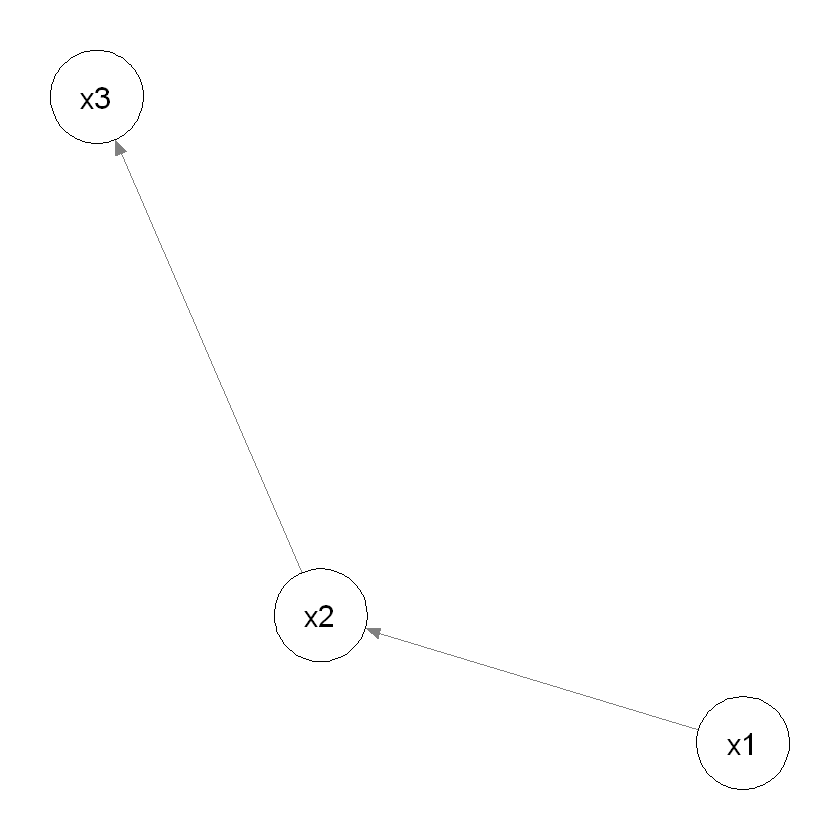

In [10]:
easy_net <- learn_network(dataset = easy_dataset, impute = FALSE, bootstrap = FALSE)

## Child Dataset

Import and inspect the dataset

In [12]:
child_data <- import_and_inspect(BN_dataset = child); child_data

Raw dataset (first 5 rows):
     V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20
[1,]  2  3  3 NA  1 NA  1  1  2   1   1   1  NA   2   2   2   3   2   1   2
[2,] NA NA  2  1  1  2  1  2  2   1   2   1   2   2  NA   2   2   1   2   2
[3,]  2  3  1  2  1 NA NA  2  2   1   2   2   2   2   2   1   2   1   2   2
[4,]  2  4  1  1  1  3 NA  1  2  NA   3  NA   1   2   1   3   1  NA   1  NA
[5,]  2  2  1 NA  2  4  1  1  1   1  NA   1  NA   2  NA  NA   1   1   2   2

Missing values per column:
 V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
883 661 633 757 624 572 772 771 543 620 878 982 552 890 990 922 664 847 994 968 



Dataset: 

num.variables 20

variables
BirthAsphyxia Disease Age LVH DuctFlow CardiacMixing LungParench LungFlow Sick HypDistrib HypoxiaInO2 CO2 ChestXray Grunting LVHReport LowerBodyO2 RUQO2 CO2Report XrayReport GruntingReport
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 6 3 2 3 4 3 3 2 2 3 3 5 2 2 3 3 2 5 2
num.items
5000
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0

Because of the missing values, here is better as algo `sem` that handles properly the NA.

In [ ]:
# occhio ci mette un po'
child_net <- learn_network(dataset = child_data, impute = FALSE, bootstrap = FALSE)

Missing values detected, using SEM algorithm.

bnstruct :: learning the structure using SEM ...

... bnstruct :: starting EM algorithm ...

... ... bnstruct :: learning network parameters ... 

... ... bnstruct :: parameter learning done.



Instead, if we want to work with a dataset without NA, we can "fill in these holes" using the function `impute`.

Imputing dataset

bnstruct :: performing imputation ...

bnstruct :: imputation finished.

Missing values detected, using SEM algorithm.

bnstruct :: learning the structure using SEM ...

... bnstruct :: starting EM algorithm ...

... ... bnstruct :: learning network parameters ... 

... ... bnstruct :: parameter learning done.

... ... bnstruct :: learning network parameters ... 

... ... bnstruct :: parameter learning done.

... bnstruct :: EM algorithm completed.

... bnstruct :: learning the structure using MMHC ...

... bnstruct :: learning using MMHC completed.

... bnstruct :: learning network parameters ... 

... bnstruct :: parameter learning done.

... bnstruct :: starting EM algorithm ...

... ... bnstruct :: learning network parameters ... 

... ... bnstruct :: parameter learning done.

Warning message:
"Combining vertex/edge sequences from different graphs.
✖ This will not work in future igraph versions."
Warning message:
"Combining vertex/edge sequences from different gra


Execution Time: 1214.13 s

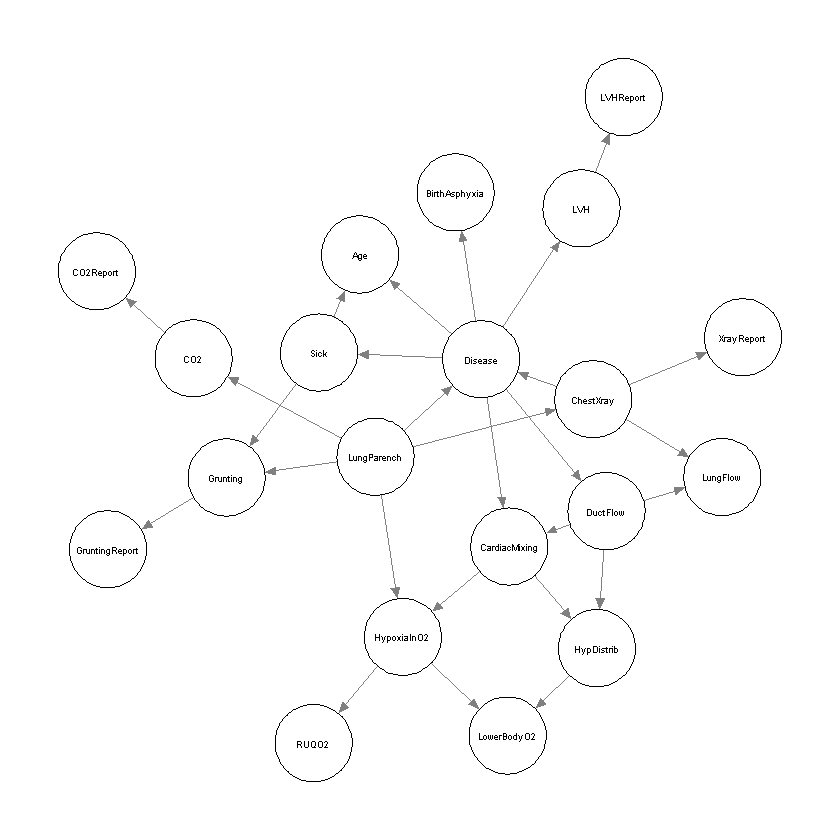

In [13]:
child_net <- learn_network(dataset = child_data, impute = TRUE, bootstrap = FALSE)

## Asia Dataset

In [11]:
asia_data <- import_and_inspect(BN_dataset = asia); asia_data

Raw dataset (first 5 rows):
     V1 V2 V3 V4 V5 V6 V7 V8
[1,]  2  2  1  1  1  2  1  2
[2,]  2  1  1  1  1  1  2  1
[3,]  1  1  2  1  1  1  2  1
[4,]  2  1  2  1  1  1  2  1
[5,]  2  1  2  1  1  1  1  2

Missing values per column:
V1 V2 V3 V4 V5 V6 V7 V8 
 0  0  0  0  0  0  0  0 
[1] "BNDataset"
attr(,"package")
[1] "bnstruct"



Dataset: 

num.variables 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2
num.items
10000
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0

Learning network using default method: MMHC algorithm and BDeu score function.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

Warning message in (function (input, ...) :
"The following arguments are not documented and likely not arguments of qgraph and thus ignored: main"



Execution Time: 0.8449898 s

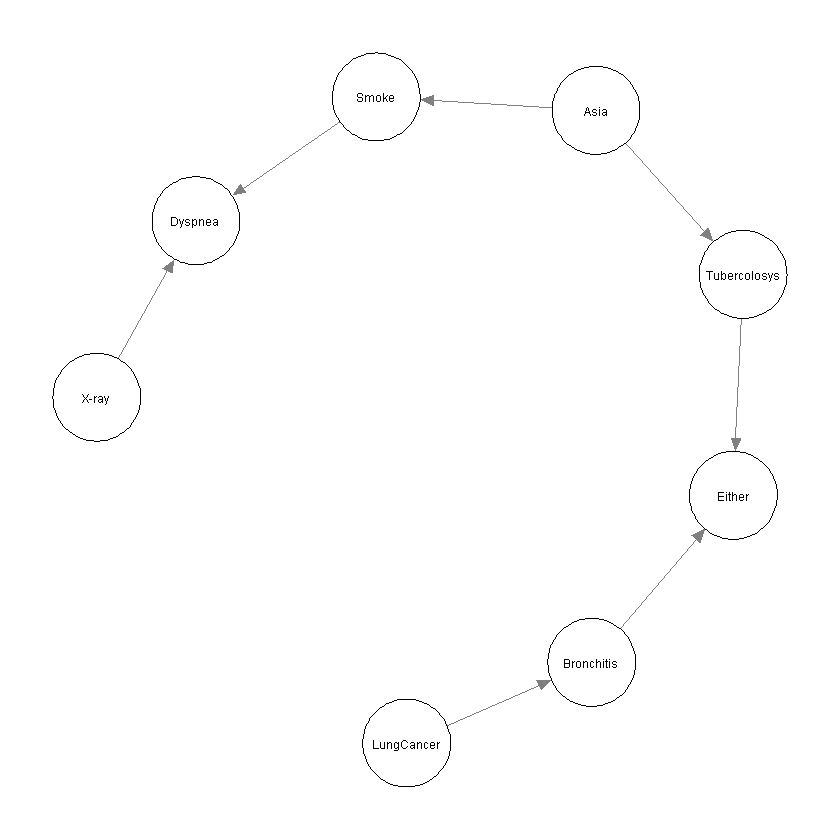

In [23]:
asia_net <- learn_network(dataset = asia_data, impute = FALSE, bootstrap = FALSE)

We can use bootstrap to learn more about the dataset(?)

In [ ]:
asia_net <- learn_network(dataset = asia_data, impute = FALSE, bootstrap = TRUE)   # default value is num.boots = 100